In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import itertools
# ----設定繪圖-------
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft Dexter'] 
plt.rcParams['axes.unicode_minus'] = False  
from matplotlib.font_manager import FontProperties 
import seaborn as sns 
myfont=FontProperties(fname='Microsoft JhengHei',size=14) 
sns.set(font=myfont.get_family()) 
sns.set_style("darkgrid",{"font.sans-serif":['Microsoft Dexter']}) 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.max_seq_items = None
#------時間------
from datetime import datetime,timedelta
from datetime import datetime as dt
import time
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,cross_validate
from sklearn.externals import joblib
from sklearn.ensemble import IsolationForest
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score,f1_score,r2_score,recall_score,roc_auc_score,precision_recall_curve,roc_curve,auc
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
import scikitplot as skplt
from category_encoders import TargetEncoder

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
df_head = pd.read_csv('D:/karma5.0/0121/head.csv')
df = pd.read_csv('D:/karma5.0/0212/K5datasets01to20.csv',names=df_head.columns.tolist())
print('-'*10,'Data Sets information','-'*10)
print('datasets raw counts',df.shape[0])
print('datasets column counts',df.shape[1])


L11=[]
L22=list(df.isnull().sum()/len(df))
for i in df:
    #print('column name','kinds counts')
    L11.append((i,len(df[str(i)].value_counts())))
print('-'*10,'Check 1-value-variable column','-'*10)
df0 = pd.DataFrame(L11,columns=['column_name','species_counts'])
print(df0[df0['species_counts']==1])
print('-'*10,'Check 1-value-variable value and counts','-'*10)
for i in df0['column_name'][df0['species_counts']==1]:
    print(df[str(i)].value_counts())

---------- Data Sets information ----------
datasets raw counts 557331
datasets column counts 444
---------- Check 1-value-variable column ----------
        column_name  species_counts
163    L1D_BlockCNT               1
404    L14D_conMCNT               1
435  WarrantyPeriod               1
---------- Check 1-value-variable value and counts ----------
1.0    28
Name: L1D_BlockCNT, dtype: int64
0.0    373153
Name: L14D_conMCNT, dtype: int64
7    557331
Name: WarrantyPeriod, dtype: int64


In [3]:
df_data = df[['DDwFD', 'contractsn', 'DATE', 'DuringMBA', 'RH', 'AH', 're', 'fbCNT',
       'nCR', 'nMR', 'nTR', 'nconcompla', 'nconcompli', 'nmatcompla',
       'nmatcompli', 'nteccompla', 'accLIKE', 'proLIKE', 'accDLIKE',
       'proDLIKE', 'FavorCNT', 'BlockCNT', 'AddFavorCNT', 'AddBlockCNT',
       'star', 'isIntCNT', 'LVdiffCNT', 'MGMLead', 'MGMRes', 'MGMDemo',
       'MGMDeal', 'conUUCCNT', 'conSOUCNT', 'conSERCNT', 'conTWBCNT',
       'conOTHCNT', 'conLigCNT', 'conMedCNT', 'conTanCNT', 'conDarCNT',
       'conEx01CNT', 'conEx03CNT', 'conEx12CNT', 'conEx24CNT', 'conage30CNT',
       'conage40CNT', 'conage50CNT', 'conage60CNT', 'conage61CNT', 'conMCNT',
       'conFCNT', 'helpCNT', 'helpCNTmax', 'help3mCNT', 'help3mCNTmax',
       'helpITCNT', 'helpITCNTmax', 'helpIT3mCNT', 'helpIT3mCNTmax',
       'helpIiCNT', 'helpIiCNTmax', 'helpIi3mCNT', 'helpIi3mCNTmax',
       'helpMaCNT', 'helpMaCNTmax', 'helpMa3mCNT', 'helpMa3mCNTmax',
       'helpTeCNT', 'helpTeCNTmax', 'helpTe3mCNT', 'helpTe3mCNTmax',
       'helpconCNT', 'helpconCNTmax', 'helpcon3mCNT', 'helpcon3mCNTmax',
       'ALL_RH', 'ALL_AH', 'ALL_re', 'ALL_fbCNT', 'ALL_nCR', 'ALL_nMR',
       'ALL_nTR', 'ALL_nconcompla', 'ALL_nconcompli', 'ALL_nmatcompla',
       'ALL_nmatcompli', 'ALL_nteccompla', 'ALL_accLIKE', 'ALL_proLIKE',
       'ALL_accDLIKE', 'ALL_proDLIKE', 'ALL_FavorCNT', 'ALL_BlockCNT',
       'ALL_AddFavorCNT', 'ALL_AddBlockCNT', 'ALL_star', 'ALL_isIntCNT',
       'ALL_LVdiffCNT', 'ALL_MGMLead', 'ALL_MGMRes', 'ALL_MGMDemo',
       'ALL_MGMDeal', 'ALL_conUUCCNT', 'ALL_conSOUCNT', 'ALL_conSERCNT',
       'ALL_conTWBCNT', 'ALL_conOTHCNT', 'ALL_conLigCNT', 'ALL_conMedCNT',
       'ALL_conTanCNT', 'ALL_conDarCNT', 'ALL_conEx01CNT', 'ALL_conEx03CNT',
       'ALL_conEx12CNT', 'ALL_conEx24CNT', 'ALL_conage30CNT',
       'ALL_conage40CNT', 'ALL_conage50CNT', 'ALL_conage60CNT',
       'ALL_conage61CNT', 'ALL_conMCNT', 'ALL_conFCNT', 'ALL_helpCNT',
       'ALL_helpCNTmax', 'ALL_help3mCNT', 'ALL_help3mCNTmax', 'ALL_helpITCNT',
       'ALL_helpITCNTmax', 'ALL_helpIT3mCNT', 'ALL_helpIT3mCNTmax',
       'ALL_helpIiCNT', 'ALL_helpIiCNTmax', 'ALL_helpIi3mCNT',
       'ALL_helpIi3mCNTmax', 'ALL_helpMaCNT', 'ALL_helpMaCNTmax',
       'ALL_helpMa3mCNT', 'ALL_helpMa3mCNTmax', 'ALL_helpTeCNT',
       'ALL_helpTeCNTmax', 'ALL_helpTe3mCNT', 'ALL_helpTe3mCNTmax',
       'ALL_helpconCNT', 'ALL_helpconCNTmax', 'ALL_helpcon3mCNT',
       'ALL_helpcon3mCNTmax','FDsellingdate',
       'product_sdate', 'mb', 'mb_STV', 'mbdate', 'WarrantyPeriod', 'mbaCNT',
       'mbadate_First', 'mbadate_New', 'MBA_technical', 'MBA_customer',
       'MBA_Scheduling', 'MBA_Class', 'MBA_Service']]


df_data['MBA_technical'] = df_data['MBA_technical'].fillna(0)
df_data['MBA_customer'] = df_data['MBA_customer'].fillna(0)
df_data['MBA_Scheduling'] = df_data['MBA_Scheduling'].fillna(0)
df_data['MBA_Class'] = df_data['MBA_Class'].fillna(0)
df_data['MBA_Service'] = df_data['MBA_Service'].fillna(0)
df_data['MBA_total']=df_data['MBA_Class']+df_data['MBA_Scheduling']+df_data['MBA_Service']+df_data['MBA_customer']+df_data['MBA_technical']
df_data['mbadate_First']=pd.to_datetime(df_data['mbadate_First']).dt.date
df_data['mbadate_New']=pd.to_datetime(df_data['mbadate_New']).dt.date
df_data['FDsellingdate']=pd.to_datetime(df_data['FDsellingdate']).dt.date
df_data['mbdate']=pd.to_datetime(df_data['mbdate']).dt.date

df_data['mbadiff'] = df_data['mbadate_New']-df_data['mbadate_First']
df_data['mbtime'] = df_data['mbdate']-df_data['FDsellingdate']
df_data['mbaFtoSelltime'] = df_data['mbadate_First']-df_data['FDsellingdate']
df_data['mbaNtoSelltime'] = df_data['mbadate_New']-df_data['FDsellingdate']
df_data['mbFdiff'] = df_data['mbdate']-df_data['mbadate_First']
df_data['mbNdiff'] = df_data['mbdate']-df_data['mbadate_New']
df_data = df_data.drop(['MBA_technical','MBA_customer','MBA_Scheduling','MBA_Class','MBA_Service'],axis=1)
df_data = df_data.drop(['ALL_nconcompli','ALL_nmatcompli'],axis=1)
df_data = df_data.drop(['mbadate_First','mbadate_New','FDsellingdate'],axis=1)
df_data = df_data.drop(['WarrantyPeriod'],axis=1)
df_data = df_data.drop(['product_sdate'],axis=1)

df_data['mbadiff'] = (df_data['mbadiff'] / np.timedelta64(1, 'D')).astype(float)
df_data['mbaFtoSelltime'] = (df_data['mbaFtoSelltime'] / np.timedelta64(1, 'D')).astype(float)
df_data['mbaNtoSelltime'] = (df_data['mbaNtoSelltime'] / np.timedelta64(1, 'D')).astype(float)

df_data['RH'] = df_data['RH'].fillna(0)
df_data['AH'] = df_data['AH'].fillna(0)
df_data['re'] = df_data['re'].fillna(0)
df_data['fbCNT'] = df_data['fbCNT'].fillna(0)
df_data['nCR'] = df_data['nCR'].fillna(0)
df_data['nMR'] = df_data['nMR'].fillna(0)
df_data['nTR'] = df_data['nTR'].fillna(0)
#mean_nconcompla = df_data['nconcompla'].mean()
#mean_nmatcompla = df_data['nmatcompla'].mean()
#mean_nteccompla = df_data['nteccompla'].mean()
df_data['nconcompla'] = df_data['nconcompla'].fillna(0)
df_data['nmatcompla'] = df_data['nmatcompla'].fillna(0)
df_data['nteccompla'] = df_data['nteccompla'].fillna(0)
df_data['star'] = df_data['star'].fillna(1)
df_data = df_data[df_data['star']<=5.0]
df_data['ALL_star'] = df_data['ALL_star'].fillna(1)
df_data = df_data[df_data['ALL_star']<=10.0]
df_data['isIntCNT'] = df_data['isIntCNT'].fillna(0)
df_data['ALL_RH'] = df_data['ALL_RH'].fillna(0)
df_data['ALL_AH'] = df_data['ALL_AH'].fillna(0)
df_data['ALL_re'] = df_data['ALL_re'].fillna(0)
df_data['ALL_fbCNT'] = df_data['ALL_fbCNT'].fillna(0)
df_data['ALL_nCR'] = df_data['ALL_nCR'].fillna(1)
df_data['ALL_nMR'] = df_data['ALL_nMR'].fillna(1)
df_data['ALL_nTR'] = df_data['ALL_nTR'].fillna(1)
df_data['ALL_nconcompla'] = df_data['ALL_nconcompla'].fillna(1)
df_data['ALL_nmatcompla'] = df_data['ALL_nmatcompla'].fillna(1)
df_data['ALL_nteccompla'] = df_data['ALL_nteccompla'].fillna(1)
df_data['ALL_isIntCNT'] = df_data['ALL_isIntCNT'].fillna(0)
df_data['MGM_total'] = df_data['MGMLead']+df_data['MGMRes']+df_data['MGMDemo']+df_data['MGMDeal']
df_data['ALL_MGM_total']= df_data['ALL_MGMLead']+df_data['ALL_MGMRes']+df_data['ALL_MGMDemo']+df_data['ALL_MGMDeal']
df_data['Like_total'] = df_data['accLIKE']+df_data['proLIKE']
df_data['ALL_Like_total'] = df_data['ALL_accLIKE']+df_data['ALL_proLIKE']
df_data['DLike_total'] = df_data['accDLIKE']+df_data['proDLIKE']
df_data['ALL_DLike_total'] = df_data['ALL_accDLIKE']+df_data['ALL_proDLIKE']
df_data['help_total'] = df_data['helpITCNT']+df_data['helpIiCNT']+df_data['helpTeCNT']+df_data['helpMaCNT']+df_data['helpconCNT']
df_data['ALL_help_total'] = df_data['ALL_helpITCNT']+df_data['ALL_helpIiCNT']+df_data['ALL_helpTeCNT']+df_data['ALL_helpMaCNT']+df_data['ALL_helpconCNT']
df_data['help_max_total'] = df_data['helpITCNTmax']+df_data['helpIiCNTmax']+df_data['helpTeCNTmax']+df_data['helpMaCNTmax']+df_data['helpconCNTmax']
df_data['ALL_help_max_total'] = df_data['ALL_helpITCNTmax']+df_data['ALL_helpIiCNTmax']+df_data['ALL_helpTeCNTmax']+df_data['ALL_helpMaCNTmax']+df_data['ALL_helpconCNTmax']
df_data['3mhelp_max_total'] = df_data['helpIT3mCNTmax']+df_data['helpIi3mCNTmax']+df_data['helpTe3mCNTmax']+df_data['helpMa3mCNTmax']+df_data['helpcon3mCNTmax']
df_data['ALL3m_help_max_total'] = df_data['ALL_helpIT3mCNTmax']+df_data['ALL_helpIi3mCNTmax']+df_data['ALL_helpTe3mCNTmax']+df_data['ALL_helpMa3mCNTmax']+df_data['ALL_helpcon3mCNTmax']

df_data = df_data.fillna(0)
df_data['DATE']=pd.to_datetime(df_data['DATE']).dt.date
df_data = df_data[df_data['mbaFtoSelltime']>=0.0]
df_data = df_data[df_data['mbaNtoSelltime']>=0.0]
print(df_data.shape)


df_ML = df_data[['DuringMBA', 'RH', 'AH', 're', 'fbCNT',
       'nCR', 'nMR', 'nTR', 'nconcompla', 'nmatcompla','nteccompla', 
        'isIntCNT','ALL_RH', 'ALL_AH', 'ALL_re', 'ALL_fbCNT', 'ALL_nCR', 'ALL_nMR',
       'ALL_nTR', 'ALL_nconcompla', 'ALL_nmatcompla', 'ALL_nteccompla',
       'ALL_accLIKE', 'ALL_proLIKE', 'ALL_accDLIKE', 'ALL_proDLIKE',
       'ALL_FavorCNT', 'ALL_BlockCNT', 'ALL_AddFavorCNT', 'ALL_AddBlockCNT',
       'ALL_star', 'ALL_isIntCNT',
       'ALL_conUUCCNT','ALL_conSOUCNT', 'ALL_conSERCNT', 'ALL_conTWBCNT', 'ALL_conOTHCNT',
       'ALL_conLigCNT', 'ALL_conMedCNT', 'ALL_conTanCNT', 'ALL_conDarCNT',
       'ALL_conEx01CNT', 'ALL_conEx03CNT', 'ALL_conEx12CNT', 'ALL_conEx24CNT',
       'ALL_conage30CNT', 'ALL_conage40CNT', 'ALL_conage50CNT',
       'ALL_conage60CNT', 'ALL_conage61CNT', 'ALL_conMCNT', 'ALL_conFCNT',
       'ALL_helpCNT','ALL_help3mCNT',
       'mb', 'mb_STV', 'mbaCNT',
       'MBA_total', 'mbadiff','mbaFtoSelltime', 'mbaNtoSelltime',
       'ALL_MGM_total','ALL_Like_total', 'ALL_DLike_total','ALL_help_total', 'ALL_help_max_total','ALL3m_help_max_total']]

print(df_ML.shape)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

(556478, 167)
(556478, 67)


In [4]:
y = df_ML['mb']
X = df_ML.drop(['mb'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=40)
te = TargetEncoder(cols=['DuringMBA', 'RH', 'AH', 're', 'fbCNT',
       'nCR', 'nMR', 'nTR', 'nconcompla', 'nmatcompla','nteccompla', 
        'isIntCNT','ALL_RH', 'ALL_AH', 'ALL_re', 'ALL_fbCNT', 'ALL_nCR', 'ALL_nMR',
       'ALL_nTR', 'ALL_nconcompla', 'ALL_nmatcompla', 'ALL_nteccompla',
       'ALL_accLIKE', 'ALL_proLIKE', 'ALL_accDLIKE', 'ALL_proDLIKE',
       'ALL_FavorCNT', 'ALL_BlockCNT', 'ALL_AddFavorCNT', 'ALL_AddBlockCNT',
       'ALL_star', 'ALL_isIntCNT',
       'ALL_conUUCCNT','ALL_conSOUCNT', 'ALL_conSERCNT', 'ALL_conTWBCNT', 'ALL_conOTHCNT',
       'ALL_conLigCNT', 'ALL_conMedCNT', 'ALL_conTanCNT', 'ALL_conDarCNT',
       'ALL_conEx01CNT', 'ALL_conEx03CNT', 'ALL_conEx12CNT', 'ALL_conEx24CNT',
       'ALL_conage30CNT', 'ALL_conage40CNT', 'ALL_conage50CNT',
       'ALL_conage60CNT', 'ALL_conage61CNT', 'ALL_conMCNT', 'ALL_conFCNT',
       'ALL_helpCNT','ALL_help3mCNT',
        'mb_STV', 'mbaCNT',
       'MBA_total', 'mbadiff','mbaFtoSelltime', 'mbaNtoSelltime',
       'ALL_MGM_total','ALL_Like_total', 'ALL_DLike_total','ALL_help_total', 'ALL_help_max_total','ALL3m_help_max_total']).fit(X,y)
X_train_te = te.transform(X_train)
X_test_te = te.transform(X_test)
X_te = te.transform(X)


# outlier data
X_outliers = df_ML[df_ML['mb']==1]
y_outliers = X_outliers['mb']
X_outliers = X_outliers.drop(['mb'],axis=1)
X_outliers_te = te.transform(X_outliers)

In [5]:
ocs_2 = svm.OneClassSVM(nu=0.15, kernel='rbf', gamma=0.1)
ocs_2.fit(X_train_te)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
            max_iter=-1, nu=0.15, shrinking=True, tol=0.001, verbose=False)

In [6]:
y_pre = ocs_2.predict(X_te)
y_train_pre = ocs_2.predict(X_train_te)
y_test_pre = ocs_2.predict(X_test_te)
y_out_pre = ocs_2.predict(X_outliers_te)

In [7]:
y_train_ocs=y_train_pre
y_train_ocs[y_train_pre==1]=0
y_train_ocs[y_train_pre==-1]=1

y_test_ocs=y_test_pre
y_test_ocs[y_test_pre==1]=0
y_test_ocs[y_test_pre==-1]=1

y_outliers_ocs=y_out_pre
y_outliers_ocs[y_out_pre==1]=0
y_outliers_ocs[y_out_pre==-1]=1

f1 score of test data 0.42144688697455995
AUC value of test data 0.6518925574694011
f1 score of outliers data 0.5772318725475548


<Figure size 432x288 with 0 Axes>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


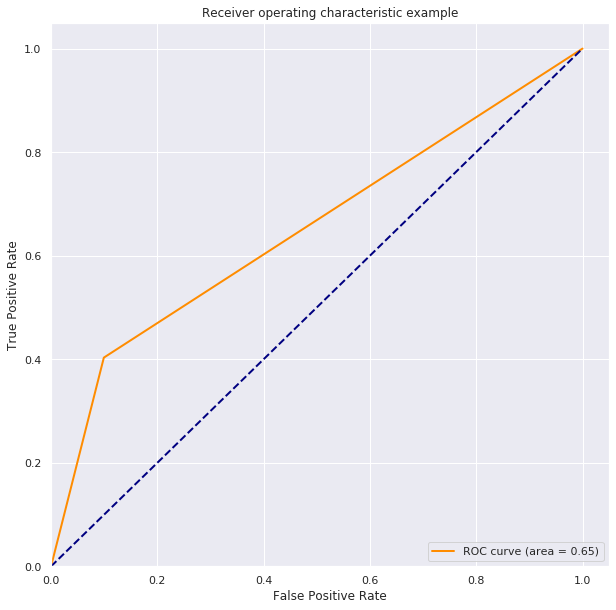

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


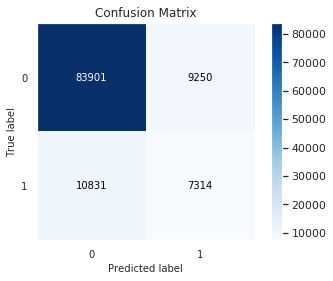

[[83901  9250]
 [10831  7314]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89     93151
           1       0.44      0.40      0.42     18145

    accuracy                           0.82    111296
   macro avg       0.66      0.65      0.66    111296
weighted avg       0.81      0.82      0.82    111296



In [8]:
print('f1 score of test data',f1_score(y_test,y_test_ocs))
print('AUC value of test data',roc_auc_score(y_test,y_test_ocs))


print('f1 score of outliers data',f1_score(y_outliers,y_outliers_ocs))

 ###計算真正率和假正率
fpr,tpr,threshold = roc_curve(y_test, y_test_ocs) ###計算真正率和假正率
###計算auc的值
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
 ###假正率為橫座標，真正率為縱座標做曲線
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

skplt.metrics.plot_confusion_matrix(y_test, y_test_ocs)
plt.show()


cf = confusion_matrix(y_test,y_test_ocs)
print(cf)

cr = classification_report(y_test,y_test_ocs)
print(cr)

In [10]:
joblib.dump(ocs_2,'D:/karma5.0/model_file/0to20/OCS_First.pkl')

['D:/karma5.0/model_file/0to20/OCS_First.pkl']